# Práctica 2

Usando el dataset de fashion MNIST realizar:

* PCA sin sklearn para reducir a 2 dimensiones
 - Anotar la cantidad de varianza preservada.
* t-SNE con sklearn para reducir a 2 dimensiones.
* Analizar ambas representaciones, comparar y concluir
* Aplicar clustering con sklearn sobre representación reducida.
* Ya que este dataset si posee etiquetas "y" (tipos de prendas), analizar si los clusters encontrados tienden a agrupar el mismo tipo de prenda o prendas similares.
* Agregar conclusiones finales.

## Setup

In [190]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from scipy.linalg import svd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Cargamos dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
# Tamaño de dataset de entrenamiento
train_images.shape

(60000, 28, 28)

In [5]:
# Tamaño de dataset de prueba
test_images.shape

(10000, 28, 28)

In [6]:
all_images = np.concatenate((train_images, test_images), axis = 0)

In [7]:
# Tamaño completo de datasets combinados

all_images.shape

(70000, 28, 28)

In [8]:
all_labels = np.concatenate((train_labels, test_labels), axis = 0) 

In [10]:
# Tamaño completo de etiquetas para set de entrenamiento y test combinados
all_labels.shape

(70000,)

In [9]:
# Preprocesamiento de imagenes

# Funcion para obtener los vectores fila de cada imagen, así como escalar tengan una media de 0, y una desviación estándar de 1
def image_processing_scaled(images):

    # We transform our training images into row vectors
    tensor = images.reshape(-1, 28 * 28)
    # Normalize image
    tensor = scale(tensor)
    
    print(tensor.shape)
    return tensor

In [10]:
scaled_images = image_processing_scaled(all_images)

(70000, 784)


## Definición de PCA con numpy


In [152]:
class PCA_numpy:
    
    def __init__(self,dataset, k_dimensions):
        
        self.data = dataset
        self.k = k_dimensions
        self.variance = 0
        self.principal_components = 0
    
    def __SVD(self):
        
        cov_matrix = np.cov(self.data, rowvar = False)
        U, variance, _ = svd(cov_matrix)
        return U, variance
        
    def __variance(self):
        
        _, variance = self.__SVD()
        variance_pc = np.sum(variance[:self.k])/ np.sum(variance)
        return variance_pc
    
    def fit(self):
        
        U, _ = self.__SVD()
        self.variance = self.__variance()
        U_reduced = U[:, :self.k]
        self.principal_components = np.matmul(self.data, U_reduced)
    
    

In [156]:
PCA = PCA_numpy(scaled_images, 2)

In [157]:
PCA.fit()

In [158]:
PCA.principal_components.shape

(70000, 2)

In [159]:
PCA.principal_components

array([[  0.82469513, -20.86260448],
       [-17.07338982,   4.96621704],
       [  9.60003596,  12.32192784],
       ...,
       [  6.99353047,   8.48864653],
       [  2.8922854 ,  15.3764669 ],
       [ 17.53224758,  -0.12483318]])

In [286]:
PCA.variance

0.36494896917894937

In [124]:
from sklearn.decomposition import PCA

## Modelo de t-SNE con sklearn

In [134]:
from sklearn.manifold import TSNE

In [135]:
TSNE_model = TSNE(n_components=2, verbose = 1)

In [125]:
model = PCA(n_components=5)

In [126]:
model.fit_transform(scaled_images)

array([[ -0.82469513,  20.86260448, -12.90604558,   3.46000402,
         -6.6851233 ],
       [ 17.07338982,  -4.96621704,  -2.00699297,   5.97687328,
         10.89046893],
       [ -9.60003596, -12.32192784,   1.11963206,   2.56029188,
          0.22145728],
       ...,
       [ -6.99353047,  -8.48864653,   0.39552942,   6.61109452,
         -1.26216823],
       [ -2.8922854 , -15.3764669 ,  -7.59981426,  -0.97795375,
         -1.68057606],
       [-17.53224758,   0.12483318,   3.25432464,  -0.76725485,
         -1.57488862]])

In [136]:
# Entrenamiento
TSNE_model.fit_transform(scaled_images)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 26.086s...
[t-SNE] Computed neighbors for 70000 samples in 5181.198s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for

array([[-22.864887 , -36.997875 ],
       [ 35.937912 ,  -3.0439084],
       [  6.511121 ,  22.93048  ],
       ...,
       [-31.423306 ,  31.829016 ],
       [ 17.194174 ,  49.66873  ],
       [  9.620801 , -30.46307  ]], dtype=float32)

In [137]:
TSNE_model.embedding_

array([[-22.864887 , -36.997875 ],
       [ 35.937912 ,  -3.0439084],
       [  6.511121 ,  22.93048  ],
       ...,
       [-31.423306 ,  31.829016 ],
       [ 17.194174 ,  49.66873  ],
       [  9.620801 , -30.46307  ]], dtype=float32)

In [220]:
sns.set(rc={'figure.figsize':(11.7,8.27), })

sns.set_style("whitegrid")

In [197]:
label_dictionary = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [203]:
out = list()
for i in all_labels:
    x = label_dictionary.get(i)
    out.append(x)
    

## Visualización de resultados

### Visualización de t-SNE

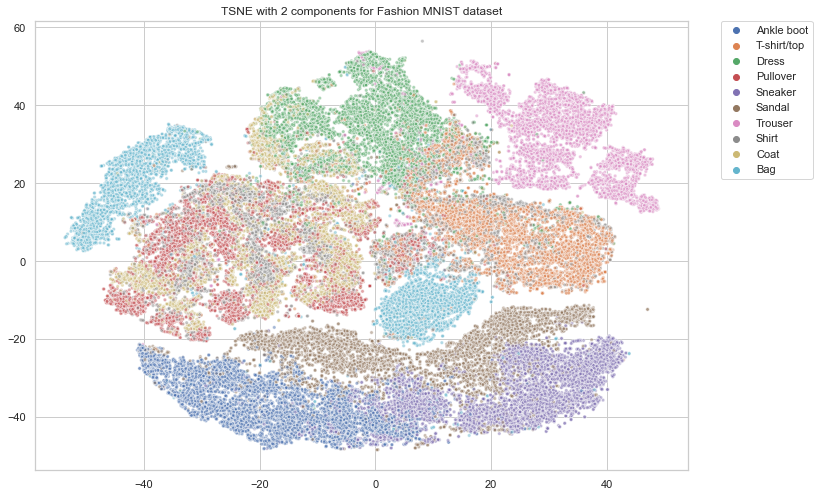

In [288]:
sns.scatterplot(x = TSNE_model.embedding_[:,0], y = TSNE_model.embedding_[:,1], hue = out, s = 12, alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset")
plt.show()

Se observa que el embedding generado por el algoritmo de t-SNE, agrupa ciertas prendas que tienen características similares. Un ejemplo de esto es el grupo de puntos que se observan en el inferior de la gráfica, los cuales corresponden a sandalias, snakers, y ankle boots. Estos eran los únicos zapatos que estaban dentro del dataset. Además, también se puede observar que hay cierta mezcla entre t-shirts y tops, con vestidos, lo cual también tiene sentido debido a que las imágenes son bastante similares. Otro punto que llama la atención es también la mezcla que se observa entre pullovers y coats, los cuales también son similares en el uso que se les da. 

### Implementación de K-means utilizando el embedding de t-SNE

In [226]:
from sklearn.cluster import KMeans

In [227]:
Kmeans_TSNE = KMeans(n_clusters = 10)

In [228]:
Kmeans_TSNE.fit(TSNE_model.embedding_)

KMeans(n_clusters=10)

In [236]:
Kmeans_TSNE.labels_.astype(str)

array(['3', '0', '6', ..., '5', '6', '2'], dtype='<U11')

In [230]:
Kmeans_TSNE.predict(TSNE_model.embedding_)

array([3, 0, 6, ..., 5, 6, 2])

In [254]:
label_dictionary_kmeans = {0:"A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "J"}

In [282]:
out_kmeans = list()
for i in Kmeans_TSNE.labels_:
    x = label_dictionary_kmeans.get(i)
    out_kmeans.append(x)

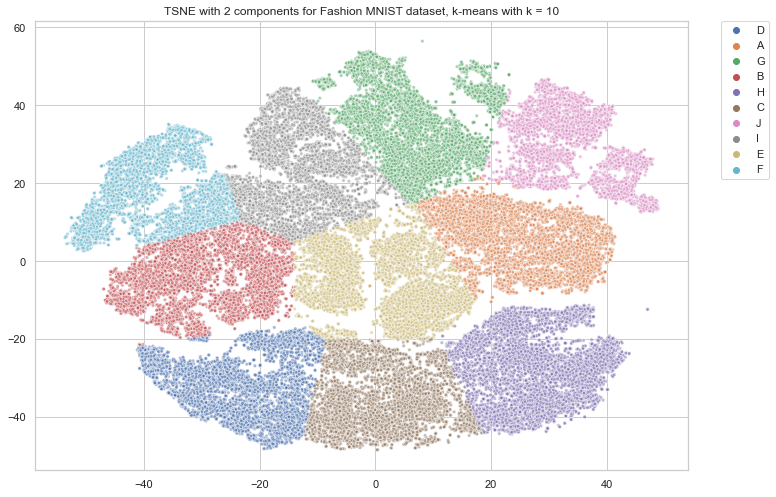

In [283]:
sns.scatterplot(x = TSNE_model.embedding_[:,0], y = TSNE_model.embedding_[:,1], hue = out_kmeans, s = 12, alpha = 0.5, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset, k-means with k = 10")
plt.show()

En esta visualización de los clusters generados por K-means con K = 10 ( se utilizó este número para simular tener la misma cantidad de categorías que el dataset real). Se observa que si existe cierta correspondencia entre los diferentes clusters formados por K-means y los grupos formados por t-SNE de las categorías reales. Los grupos generados por K-means, son, sin embargo, mucho más delimitados que aquellos generados por el embedding.

### Visualización de PCA

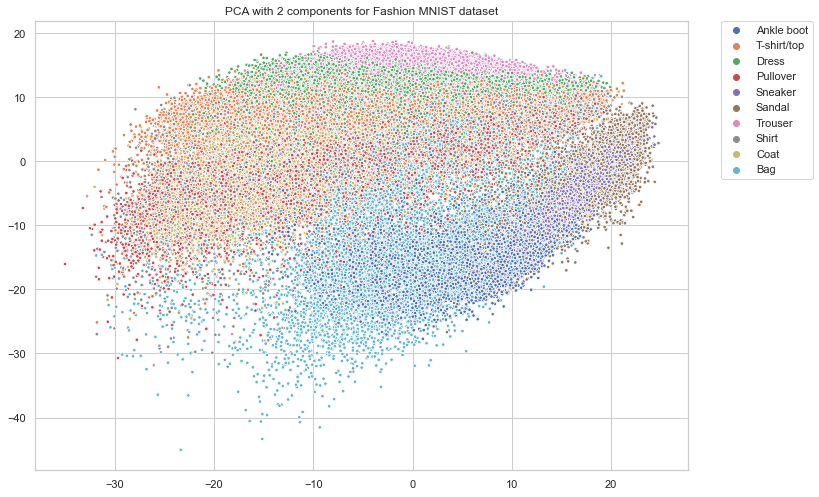

In [277]:
sns.scatterplot(x = PCA.principal_components[:,0], y = PCA.principal_components[:,1], hue = out, s = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA with 2 components for Fashion MNIST dataset")
plt.show()

Esta implementación de PCA, con 2 componentes mantiene una baja varianza proporcional a la varianza total explicada por las 784 features de las imágenes. Con 2 componentes principales únicamente se logra mantener un total de 36.5% de toda la varianza de los datos. Al aumentar el número de componentes, probablemente las distinciones específicas entre cada grupo de datos sería más evidente, aunque ya no sea factible de visualizar.

### Implementación de K-means utilizando embedding de PCA

In [262]:
Kmeans_PCA = KMeans(n_clusters = 10)

In [263]:
Kmeans_PCA.fit(PCA.principal_components)

KMeans(n_clusters=10)

In [274]:
Kmeans_PCA.labels_

array([5, 0, 9, ..., 9, 4, 7])

In [280]:
out_kmeans_pca = list()
for i in Kmeans_PCA.labels_:
    x = label_dictionary_kmeans.get(i)
    out_kmeans_pca.append(x)

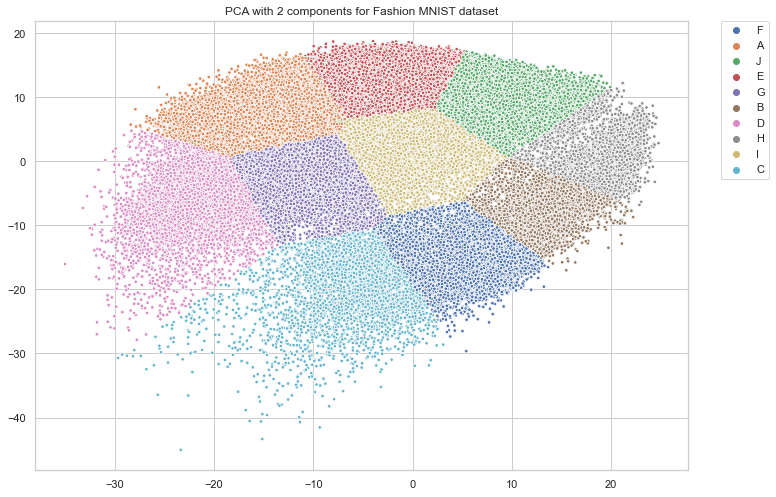

In [284]:
sns.scatterplot(x = PCA.principal_components[:,0], y = PCA.principal_components[:,1], hue = out_kmeans_pca, s = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA with 2 components for Fashion MNIST dataset")
plt.show()

Se observa que los clusters generados por el algoritmo de K-means en el embedding obtenido por medio de PCA crea ciertas fronteras muy bien delimitadas, lo cual no es el caso en el dataset real anotados por el nombre de las prendas reales. Un modelo Gaussiano mixto podría otorgar resultados en donde las fronteras de decisión en estas 2 dimensiones no sean marcadas tan explícitamente. Se observa que los clusters formados no tienen correspondencia directa con los features reales.

### Comparación de los clusters predecidos por PCA visualizados en las dos dimensiones de t-SNE

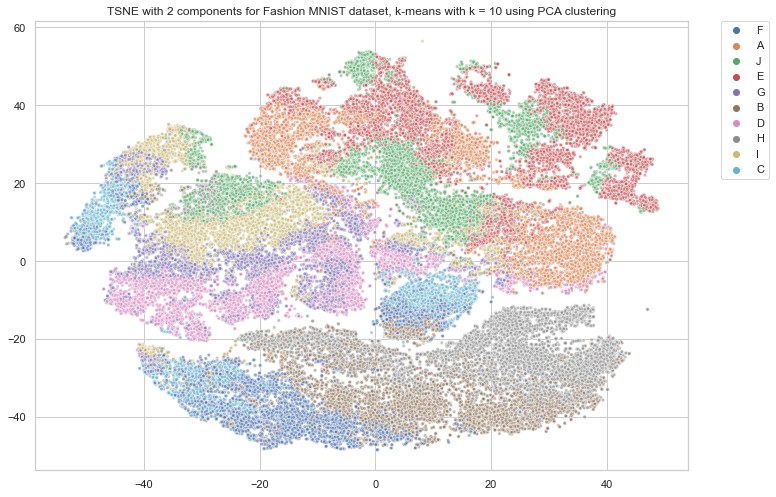

In [287]:
sns.scatterplot(x = TSNE_model.embedding_[:,0], y = TSNE_model.embedding_[:,1], hue = out_kmeans_pca, s = 12, alpha = 0.5, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("TSNE with 2 components for Fashion MNIST dataset, k-means with k = 10 using PCA clustering")
plt.show()

Para hacer una breve comparación entre los dos modelos, se decide hacer la gráfica de los embeddings generados por t-SNE utilizando como anotación los clusters generados por el K-means en los dos componentes principales de PCA. Se observa que, si bien los grupos no se observan tan explícitamente como es en el caso de la gráfica original de t-SNE, si se observa que hay cierta tendencia de agrupar ciertos grupos con caraceterísticas similares juntos, como es el caso de todas las imágenes correspondientes a calzado. 

## Conclusiones

* La visualización en 2 dimensiones fue más efectiva por medio del embedding realizado por el algoritmo de t-SNE, esto puede deberse a la manera en la que t-SNE mantiene agrupaciones que se dan en muchas dimensiones, en la representación en 2 dimensiones por medio de la optimización de la divergencia de Kullback - Leibler. 
* La implementación de PCA por medio de SVD es bastante óptima al obtener los componentes principales, ya que a pesar de que se cuenta con 70,000 registros, el algoritmo devuelve el output correspondiente rápidamente.
* Encontrar el embedding por medio de t-SNE es un proceso que, actualmente, en su implementación en sklearn es sumamente lento para grandes cantidades de datos, habiéndose tardado aproximadamente 2 horas para hacer el fit en mi computadora.
* Al utilizar K-means con 10 clusters, (al igual que las 10 etiquetas reales de los datos), se observó que los clusters se asemejaban a aquellos formados por las etiquetas reales. Este no fue el caso al aplicar K-means en PCA, en lo que no encontramos los mismos clusters por medio del algoritmo que los grupos de prendas reales.
* Es interesante observar que t-SNE agrupa varias prendas que tienen características parecidas en grupos delimitados. Por ejemplo, se observa que la mayoría de Sandals, sneakers y ankle boots, se encuentran en la parte inferior. De igual manera, los pullovers, y los coats, que tienen aspecto muy similar, no se encuentran bien delimitados en el embedding en dos dimensiones.
* Existe una librería que se llama rapids.ai, la cual actualmente tiene la implementación de t-SNE, pero ejecutada desde la GPU y no el CPU, por lo que su ejecución se vuelve considerablemente más rápida.
